In [1]:
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
# Data
from keras.preprocessing.image import ImageDataGenerator
# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout
#Callbacks
from keras.callbacks import EarlyStopping as ES, ModelCheckpoint as MC

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"mamindla809","key":"f8fb56d25c8ae428ca189a0bf5a45916"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

 97% 304M/312M [00:04<00:00, 61.1MB/s]
100% 312M/312M [00:04<00:00, 66.9MB/s]


In [5]:
!unzip /content/sea-animals-image-dataste.zip -d /content/sea-animals-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/sea-animals-dataset/Seahorse/9891995103_849905035f_o.jpg  
  inflating: /content/sea-animals-dataset/Seahorse/9984393_fb8ac77d6a_o.jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (1).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (10).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (11).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (12).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (13).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (14).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (15).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (16).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (17).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (18).jpg  
  inflating: /content/sea-animals-dataset/Seahorse/Sea Horse (19).jpg  

In [6]:
# Path to your dataset in Google Drive
dataset_path = '/content/sea-animals-dataset'



In [7]:
import os

# List the contents of the directory
directory_path = '/content/sea-animals-dataset'
directory_contents = os.listdir(directory_path)
print(directory_contents)



['Squid', 'Octopus', 'Fish', 'Seahorse', 'Crabs', 'Sea Urchins', 'Lobster', 'Starfish', 'Sharks', 'Nudibranchs', 'Dolphin', 'Shrimp', 'Otter', 'Sea Rays', 'Seal', 'Puffers', 'Jelly Fish', 'Clams', 'Eel', 'Penguin', 'Whale', 'Turtle_Tortoise', 'Corals']


In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Initialize generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],  # Corrected list syntax
    validation_split=0.1
)


In [9]:
import os

# Specify the directory path where your image dataset is located
path = '/content/sea-animals-dataset'

# Ensure the directory exists
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory '{path}' does not exist.")

# Now you can use the defined path to load the image dataset
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    batch_size=10,
    image_size=(351, 351),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)


Found 13711 files belonging to 23 classes.
Using 10969 files for training.


In [10]:
import tensorflow as tf

# Assuming you've already imported TensorFlow as tf

training_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,  # Path to the directory containing the images
    batch_size=10,   # Batch size for training
    image_size=(351, 351),  # Size of the images
    shuffle=True,    # Shuffle the dataset
    seed=123,        # Random seed for shuffling and transformations
    validation_split=0.2,  # Fraction of the dataset to use for validation
    subset='training'  # Specify 'training' to get the training dataset
)


Found 13711 files belonging to 23 classes.
Using 10969 files for training.


In [11]:
import tensorflow as tf

# Assuming you've already imported TensorFlow as tf

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,        # Path to the directory containing the images
    batch_size=10,         # Batch size for training
    image_size=(351, 351), # Size of the images
    shuffle=True,          # Shuffle the dataset
    seed=123,              # Random seed for shuffling and transformations
    validation_split=0.2,  # Fraction of the dataset to use for validation
    subset='validation'    # Specify 'validation' to get the validation dataset
)


Found 13711 files belonging to 23 classes.
Using 2742 files for validation.


In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [13]:
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam


In [14]:
class_names = [
    'Penguin', 'Clams', 'Otter', 'Eel', 'Corals', 'Puffers', 'Squid', 'Whale',
    'Sea Urchins', 'Crabs', 'Starfish', 'Seal', 'Octopus', 'Shrimp', 'Sharks',
    'Sea Rays', 'Fish', 'Seahorse', 'Nudibranchs', 'Dolphin', 'Turtle_Tortoise',
    'Jelly Fish'
]


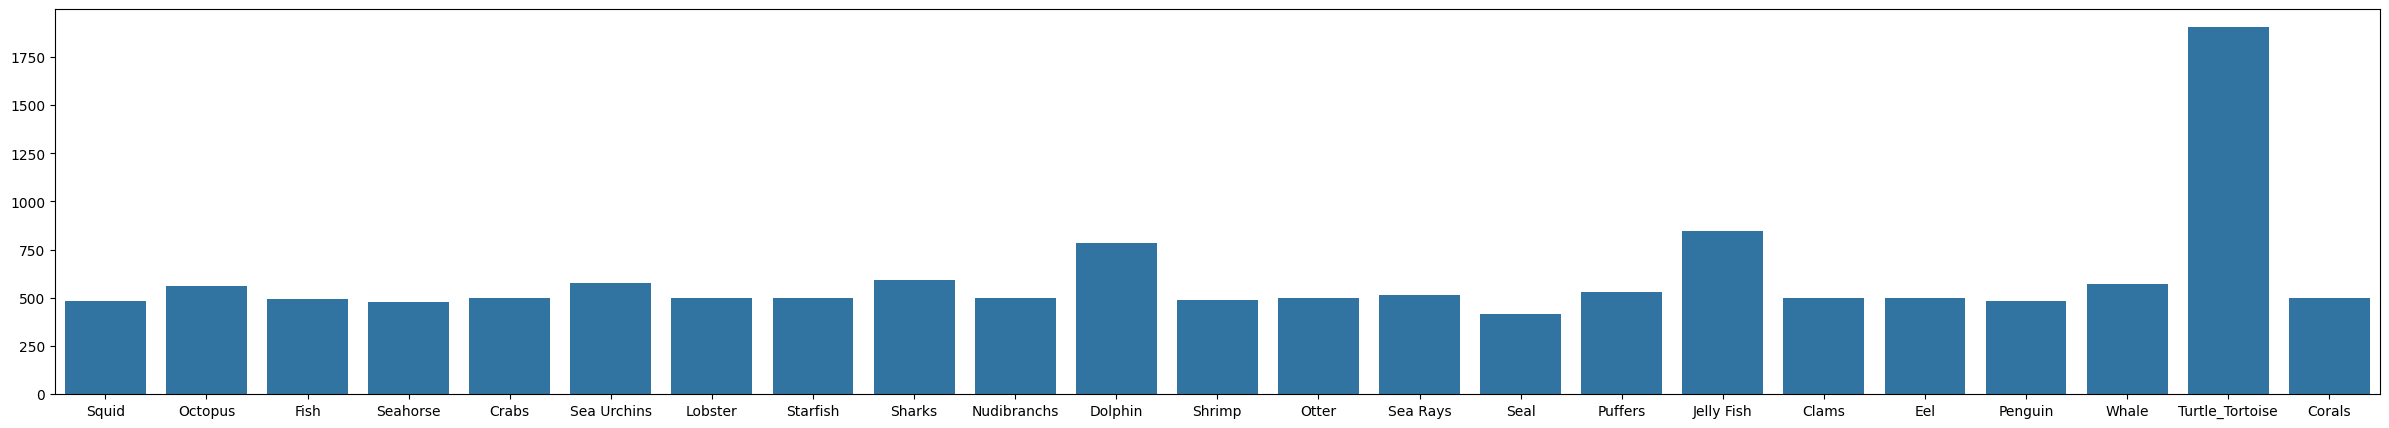

In [15]:
import os
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the directory containing class folders
path = '/content/sea-animals-dataset'

class_names = []
class_count = []
train_examples = 0

# Iterate over the directories in the path
for f in os.listdir(path):
    files = gb.glob(os.path.join(path, f, "*"))  # Concatenate directory paths
    class_names.append(f)
    class_count.append(len(files))
    train_examples += len(files)

# Plot the class distribution
plt.figure(figsize=(30, 5))
sns.barplot(x=class_names, y=class_count)
plt.show()



Found 10979 images belonging to 23 classes.


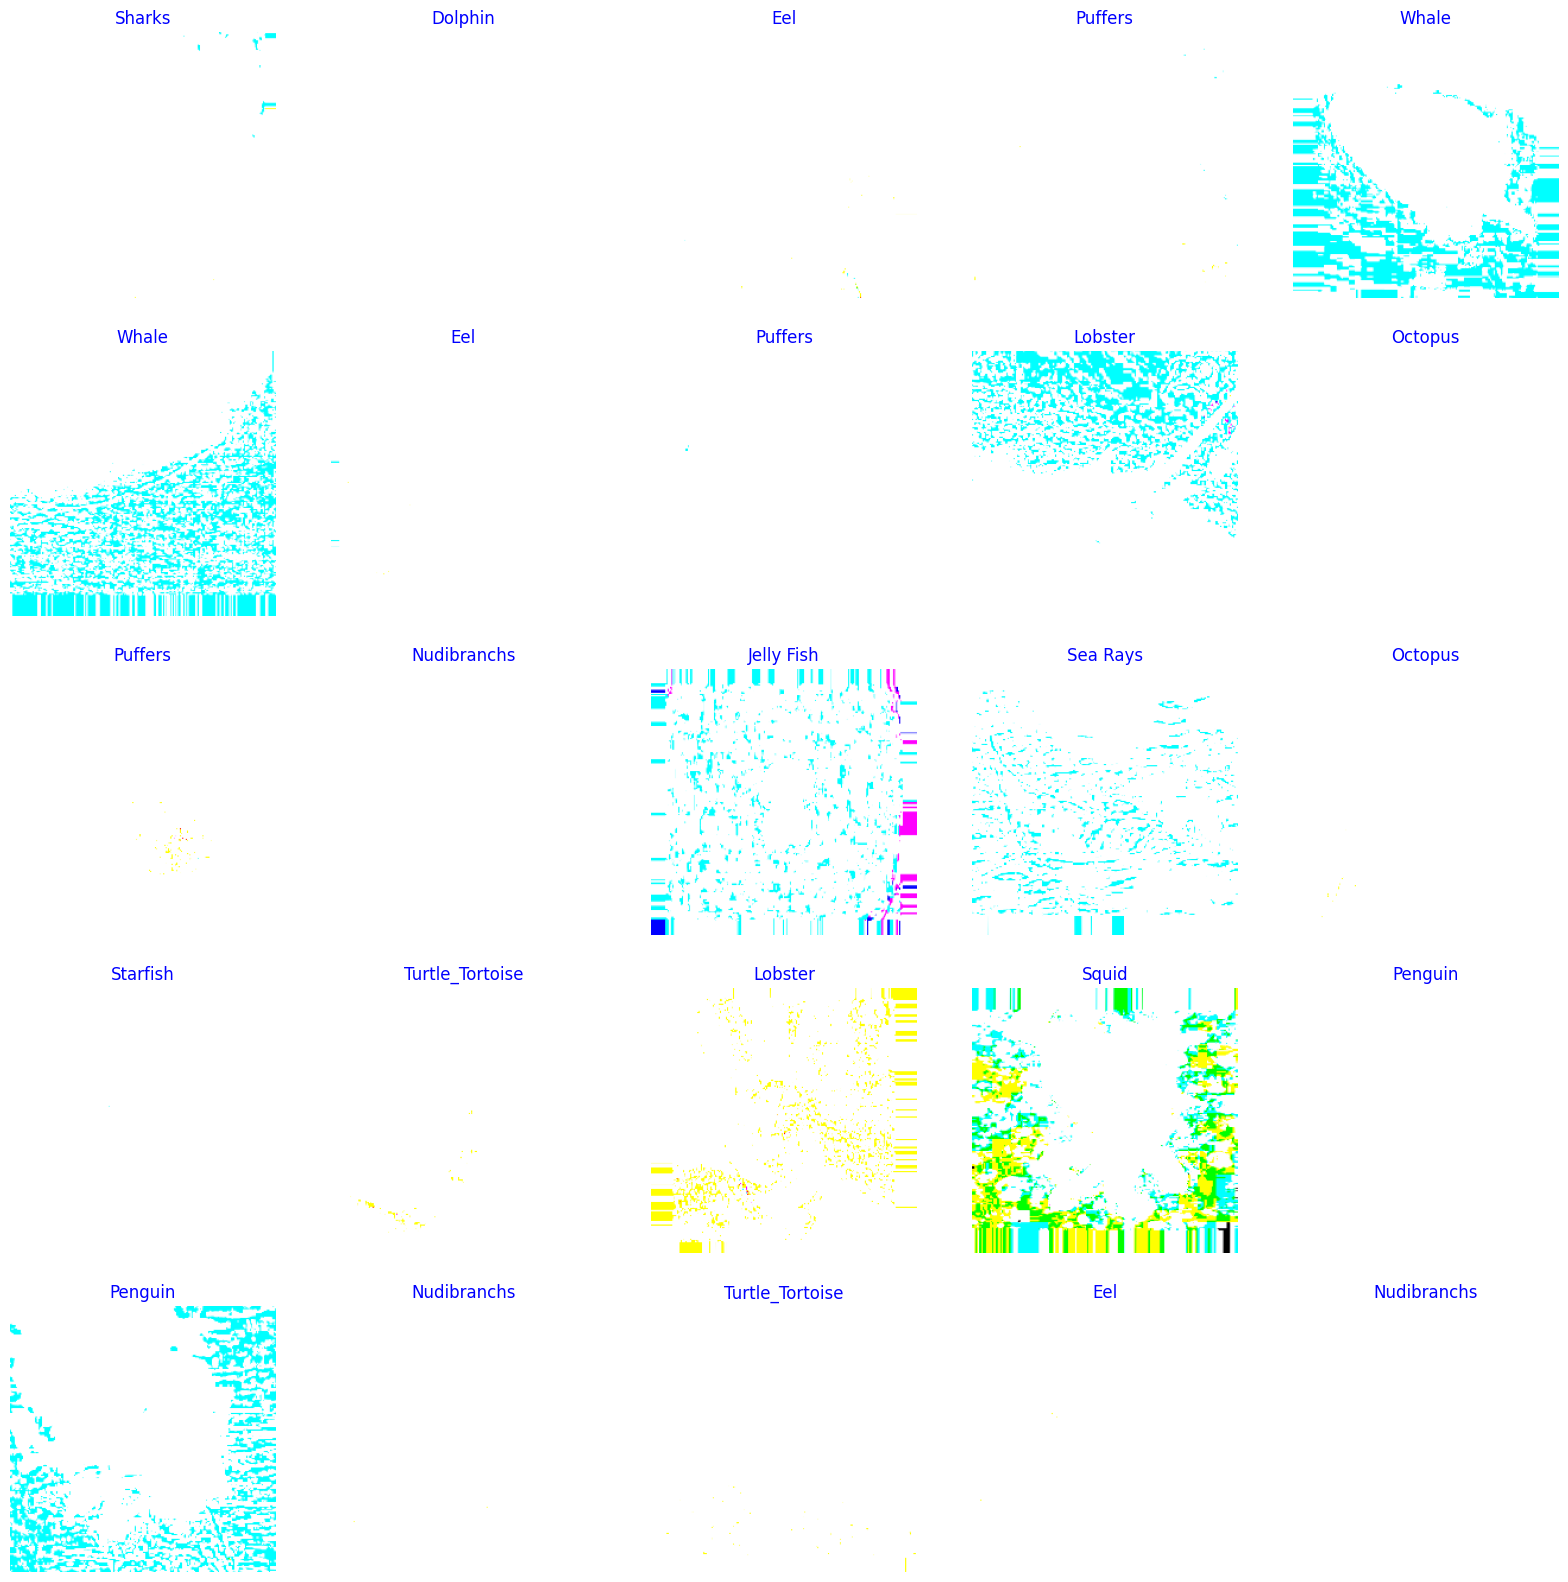

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Define image data generator for training set
train_gen = ImageDataGenerator(
    rescale=1.255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Assuming you have defined the 'train_data_directory' correctly
train_data_directory = '/content/sea-animals-dataset'

# Define the dimensions to which images should be resized
image_height = 224  # Specify the desired height of the images
image_width = 224   # Specify the desired width of the images

# Define the batch size
batch_size = 32  # Define the batch size (e.g., 32 samples per batch)

# Create a generator for the training data
train_batch = train_gen.flow_from_directory(
    directory=train_data_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    subset='training'
)

# Get the class indices
g_dict = train_batch.class_indices
classes = list(g_dict.keys())  # Get class names

# Get a batch of samples from the generator
images, labels = next(train_batch)

# Calculate the number of displayed samples
length = len(labels)
sample = min(length, 25)  # Display maximum 25 images (5x5 grid)

# Plot the images
plt.figure(figsize=(20, 20))
for i in range(sample):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
plt.show()


In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
import keras

# Define the ResNet model
resnet_model = Sequential()

# Define the pretrained ResNet50 model
pretrained_model = keras.applications.ResNet50(
    include_top=False,
    input_shape=(351, 351, 3),
    pooling='avg',
    classes=23,
    weights='imagenet'
)

# Set all layers in the pretrained model to non-trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pretrained ResNet50 model to the sequential model
resnet_model.add(pretrained_model)

# Add additional layers to the sequential model
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(23, activation='softmax'))

# Display the summary of the model
resnet_model.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 23)                23575     
                                                                 
Total params: 25709463 (98.07 MB)
Trainable params: 2121751 (8.09 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [18]:
from keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(
    directory='/content/sea-animals-dataset',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset='training',
    seed=123
)


Found 13711 files belonging to 23 classes.
Using 10969 files for training.


In [19]:
validation_data = image_dataset_from_directory(
    directory='/content/sea-animals-dataset',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset='validation',
    seed=123
)


Found 13711 files belonging to 23 classes.
Using 2742 files for validation.


In [20]:
# Compile the model
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
train_data = image_dataset_from_directory(
    directory='/content/sea-animals-dataset',
    batch_size=32,
    image_size=(351, 351),  # Resize images to match the input shape expected by the model
    validation_split=0.2,
    subset='training',
    seed=123
)


Found 13711 files belonging to 23 classes.
Using 10969 files for training.


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your training data directory
train_data_directory = '/content/sea-animals-dataset'

# Define image data generator for data augmentation and normalization
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # If you want to split your data into training and validation sets
)

# Define your training data generator
training_data = train_data_generator.flow_from_directory(
    directory=train_data_directory,
    target_size=(351, 351),  # Specify the target size of your images
    batch_size=10,  # Specify the batch size
    class_mode='categorical',  # Specify the class mode
    shuffle=True,  # Shuffle the data
    subset='training'  # Specify 'training' if you're using validation_split
)


Found 10979 images belonging to 23 classes.


In [23]:
epochs = 25
history = resnet_model.fit(
    train_data,  # Using the training data generator
    epochs=epochs,
    verbose=1
)


Epoch 1/25
343/343 [==============================] - 97s 250ms/step - loss: 1.0056 - accuracy: 0.7076
Epoch 2/25
343/343 [==============================] - 87s 252ms/step - loss: 0.5843 - accuracy: 0.8171
Epoch 3/25
343/343 [==============================] - 87s 253ms/step - loss: 0.4252 - accuracy: 0.8648
Epoch 4/25
343/343 [==============================] - 87s 252ms/step - loss: 0.3257 - accuracy: 0.8913
Epoch 5/25
343/343 [==============================] - 87s 253ms/step - loss: 0.2440 - accuracy: 0.9226
Epoch 6/25
343/343 [==============================] - 89s 258ms/step - loss: 0.1868 - accuracy: 0.9393
Epoch 7/25
343/343 [==============================] - 89s 259ms/step - loss: 0.1444 - accuracy: 0.9542
Epoch 8/25
343/343 [==============================] - 89s 259ms/step - loss: 0.1163 - accuracy: 0.9615
Epoch 9/25
343/343 [==============================] - 88s 255ms/step - loss: 0.1030 - accuracy: 0.9682
Epoch 10/25
343/343 [==============================] - 87s 253ms/step - l

In [24]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 23)                23575     
                                                                 
Total params: 25709463 (98.07 MB)
Trainable params: 2121751 (8.09 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


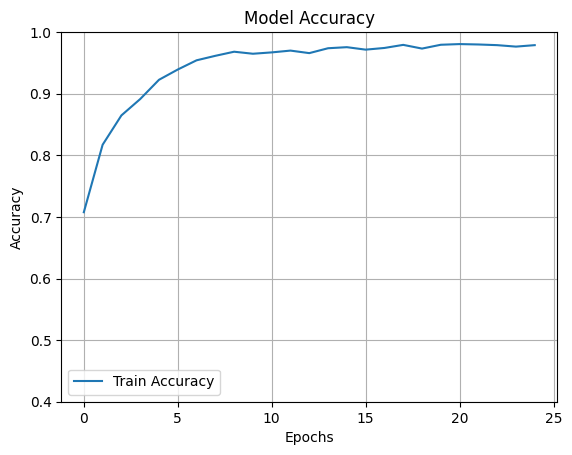

In [26]:
import matplotlib.pyplot as plt

# Plotting the model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Setting plot properties
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Display the plot
plt.show()


In [27]:
resnet_model.save("seanaimal.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from keras.preprocessing import image

# Load the saved model
model = load_model("seanaimal.h5")

# Define a function to preprocess the input image(s) if needed
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(351, 351))  # Resize image to match the model's input size
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    return img_array

# Define the path to the image you want to predict
image_path = "/content/sea-animals-dataset/Sea Rays/10427155973_be7006ff0f_o.jpg"

# Preprocess the input image
processed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(processed_image)

# Get the class labels
class_names = [
    'Penguin', 'Clams', 'Otter', 'Eel', 'Corals', 'Puffers', 'Squid', 'Whale',
    'Sea Urchins', 'Crabs', 'Starfish', 'Seal', 'Octopus', 'Shrimp', 'Sharks',
    'Sea Rays', 'Fish', 'Seahorse', 'Nudibranchs', 'Dolphin', 'Turtle_Tortoise',
    'Jelly Fish'
]

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class label
predicted_class_label = class_names[predicted_class_index]

# Print the predicted class label
print("Predicted class:", predicted_class_label)


1/1 [==============================] - 1s 1s/step
Predicted class: Sea Rays
